In [17]:
import pandas as pd
import datetime as dt

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from transformers import pipeline

In [4]:
posts_df = pd.read_csv('data/ds_ml_ai_reddit_posts.csv')
comments_df = pd.read_csv("data/ds_ml_ai_reddit_comments.csv")

In [5]:
posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7796,186,0.99
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5843,133,0.98
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4763,111,0.97
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4576,228,0.96


In [6]:
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year

In [7]:
posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7796,186,0.99,2020-05-10 10:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5843,133,0.98,2021-01-10 07:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4763,111,0.97,2020-04-25 01:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4576,228,0.96,2021-07-11 01:18:59,2021


In [8]:
comments_posts_df = posts_df.merge(comments_df, on = 'post_id', how = 'left')

comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

## EDA

In [ ]:
# Fazer eda depois

## Wordcloud

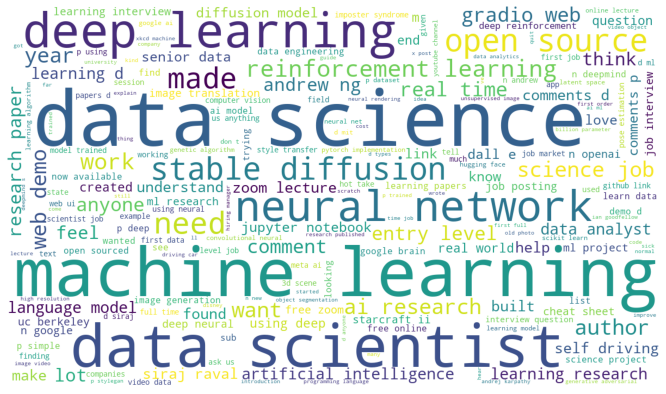

In [10]:
post_title_text = " ".join([title for title in posts_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold=2, width=1200, height=700,
                       background_color='white').generate(post_title_text)

plt.figure(figsize=(12,7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [11]:
# Build word cloud by year interactively

## Sentiment analysis

In [18]:
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.